In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_classes = 5
samples_per_class = 200
N = n_classes * samples_per_class

centers = np.array([
    [-4.0, -4.0], 
    [-4.0,  4.0],
    [ 4.0, -4.0],
    [ 4.0,  4.0], 
    [ 0.0,  0.0] 
])

X = np.zeros((N, 2))
y = np.zeros(N, dtype=int)

for i in range(n_classes):
    start = i * samples_per_class
    end = (i+1) * samples_per_class

    X[start:end] = centers[i] + 1.0 * np.random.randn(samples_per_class, 2)
    y[start:end] = i

perm = np.random.permutation(N)
X = X[perm]
y = y[perm]

Y = np.eye(n_classes)[y]

split = int(0.8 * N)

X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]
y_train, y_test = y[:split], y[split:]

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


Data Shapes:
X_train: (800, 2), Y_train: (800, 5)
X_test:  (200, 2), Y_test:  (200, 5)


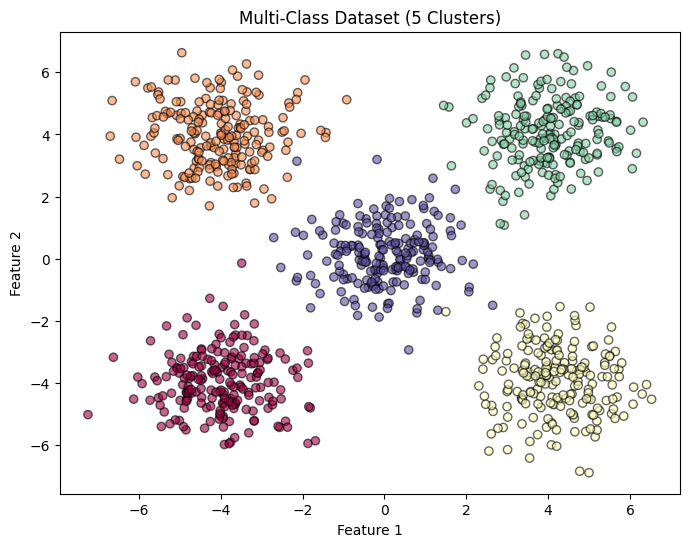

In [3]:
print(f"Data Shapes:")
print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"X_test:  {X_test.shape}, Y_test:  {Y_test.shape}")

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k', alpha=0.6)
plt.title("Multi-Class Dataset (5 Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_classes = 5
samples_per_class = 200
N = n_classes * samples_per_class

centers = np.array([
    [-4.0, -4.0],
    [-4.0,  4.0],
    [ 4.0, -4.0],
    [ 4.0,  4.0],
    [ 0.0,  0.0]
])

X = np.zeros((N, 2))
y = np.zeros(N, dtype=int)

for i in range(n_classes):
    start = i * samples_per_class
    end = (i+1) * samples_per_class
    X[start:end] = centers[i] + 1.0 * np.random.randn(samples_per_class, 2)
    y[start:end] = i

perm = np.random.permutation(N)
X = X[perm]
y = y[perm]

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

def one_hot(labels, num_classes):
    oh = np.zeros((labels.shape[0], num_classes))
    for i in range(labels.shape[0]):
        oh[i, labels[i]] = 1
    return oh

Y = one_hot(y, n_classes)

split = int(0.8 * N)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]
y_train, y_test = y[:split], y[split:] 

class NeuralNetwork(object):
    def __init__(self):
        input_neurons = 2
        hidden1 = 16
        hidden2 = 12
        hidden3 = 8
        output_neurons = 5

        self.lr = 0.05 

        self.W1 = np.random.randn(input_neurons, hidden1) * 0.1
        self.W2 = np.random.randn(hidden1, hidden2) * 0.1
        self.W3 = np.random.randn(hidden2, hidden3) * 0.1
        self.W4 = np.random.randn(hidden3, output_neurons) * 0.1

        self.b1 = np.zeros((1, hidden1))
        self.b2 = np.zeros((1, hidden2))
        self.b3 = np.zeros((1, hidden3))
        self.b4 = np.zeros((1, output_neurons))
        
        self.loss_history = []

    def relu(self, x, der=False):
        if der:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    # Feedforward
    def feedForward(self, X):
        self.h1 = self.relu(np.dot(X, self.W1) + self.b1)
        self.h2 = self.relu(np.dot(self.h1, self.W2) + self.b2)
        self.h3 = self.relu(np.dot(self.h2, self.W3) + self.b3)
        self.out = self.softmax(np.dot(self.h3, self.W4) + self.b4)
        return self.out

    # Backpropagation
    def backPropagation(self, X, Y, pred):
        m = X.shape[0]
        
        delta4 = (pred - Y)
        dW4 = np.dot(self.h3.T, delta4) / m
        db4 = np.sum(delta4, axis=0, keepdims=True) / m

        delta3 = np.dot(delta4, self.W4.T) * self.relu(self.h3, der=True)
        dW3 = np.dot(self.h2.T, delta3) / m
        db3 = np.sum(delta3, axis=0, keepdims=True) / m

        delta2 = np.dot(delta3, self.W3.T) * self.relu(self.h2, der=True)
        dW2 = np.dot(self.h1.T, delta2) / m
        db2 = np.sum(delta2, axis=0, keepdims=True) / m

        delta1 = np.dot(delta2, self.W2.T) * self.relu(self.h1, der=True)
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0, keepdims=True) / m

        self.W4 -= self.lr * dW4
        self.b4 -= self.lr * db4
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    # Train
    def train(self, X, Y, epochs=1000):
        for i in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            
            loss = -np.mean(np.sum(Y * np.log(pred + 1e-9), axis=1))
            self.loss_history.append(loss)
            
            if i % 500 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")

    def predict(self, X):
        pred = self.feedForward(X)
        return np.argmax(pred, axis=1)


nn = NeuralNetwork()

Starting Training...
Epoch 0, Loss: 1.6086
Epoch 500, Loss: 1.0327
Epoch 1000, Loss: 0.0532
Epoch 1500, Loss: 0.0194
Epoch 2000, Loss: 0.0145
Epoch 2500, Loss: 0.0127

Final Accuracy: 100.00%

Confusion Matrix (Rows=Actual, Cols=Predicted):
[[37  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 45  0]
 [ 0  0  0  0 44]]


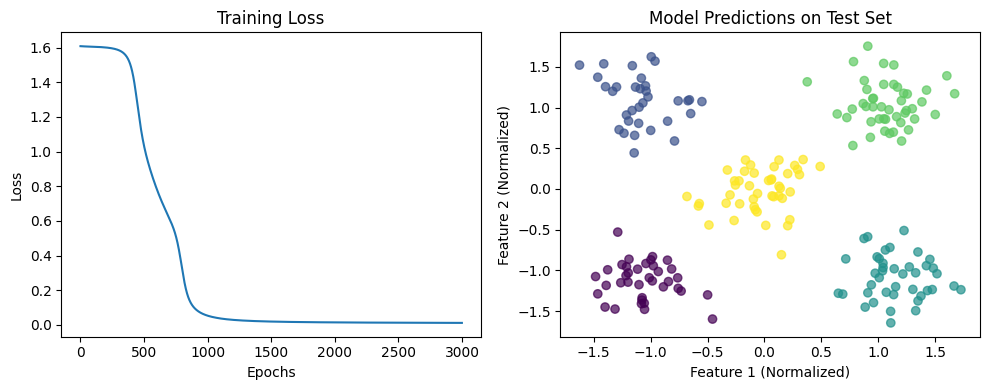

In [5]:
print("Starting Training...")
nn.train(X_train, Y_train, epochs=3000)

y_pred_test = nn.predict(X_test)

accuracy = np.mean(y_pred_test == y_test)
print(f"\nFinal Accuracy: {accuracy * 100:.2f}%")

confusion_matrix = np.zeros((n_classes, n_classes), dtype=int)
for t, p in zip(y_test, y_pred_test):
    confusion_matrix[t, p] += 1

print("\nConfusion Matrix (Rows=Actual, Cols=Predicted):")
print(confusion_matrix)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(nn.loss_history)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='viridis', alpha=0.7)
plt.title("Model Predictions on Test Set")
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")

plt.tight_layout()
plt.show()

Confusion Matrix (rows=true, columns=predicted):
[[37  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  0 41  0  0]
 [ 0  0  0 45  0]
 [ 0  0  0  0 44]]


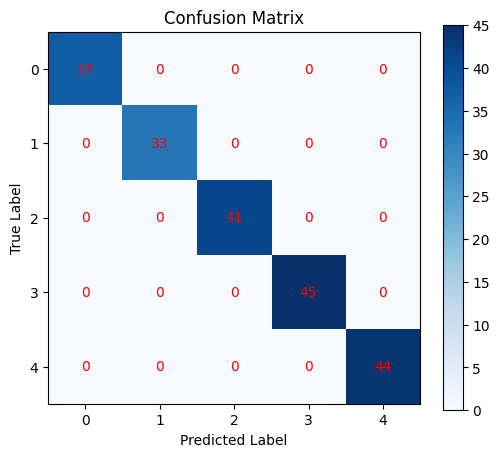

In [6]:

conf_mat = np.zeros((n_classes, n_classes), dtype=int)

for true, pred_label in zip(y_test, y_pred_test):
    conf_mat[true, pred_label] += 1

print("Confusion Matrix (rows=true, columns=predicted):")
print(conf_mat)

# Optional: Plot as heatmap
plt.figure(figsize=(6,5))
plt.imshow(conf_mat, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.xticks(np.arange(n_classes))
plt.yticks(np.arange(n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        plt.text(j, i, conf_mat[i,j], ha='center', va='center', color='red')
plt.show()